In [37]:
from roc2pr import PRCurve
from numpy import allclose

%matplotlib inline
import matplotlib.pyplot as plt

Define points on an example precision-recall curve.

In [38]:
recall_vals = [0.25, 0.4, 0.5]
precision_vals = [0.5, 0.3, 0.25]
pr_points = zip(recall_vals, precision_vals)

Create the PRCurve instance.

In [39]:
pr = PRCurve(pr_points, pos_neg_ratio=0.25)

Resample, to get another precision-recall curve, with 100 points!

In [40]:
pr_sampled = pr.resample(num_points=100)

Convert to a ROC curve.

In [41]:
roc = pr.to_roc()

We can resample this ROC curve, as well!

In [42]:
roc_sampled = roc.resample(num_points=100)

Get the points (as a list of 2-tuples) on any curve with the *.points()* method.

In [43]:
pr_points = pr.points()
pr_sampled_points = pr_sampled.points()
roc_points = roc.points()
roc_sampled_points = roc_sampled.points()

You can re-convert the ROC curve back to a PR curve!

In [44]:
pr_reconverted = roc.to_pr()

Let's check that the reconversion was correct.

In [45]:
assert allclose(pr_reconverted.points(), pr.points())

Finally, let's plot everything!

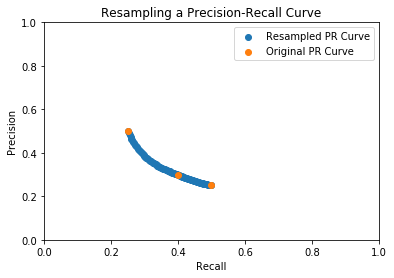

In [46]:
plt.scatter(*zip(*pr_sampled_points), label='Resampled PR Curve')
plt.scatter(*zip(*pr_points), label='Original PR Curve')
plt.legend()
plt.xlabel('Recall')
plt.xlim((0, 1))
plt.ylabel('Precision')
plt.ylim((0, 1))
plt.title('Resampling a Precision-Recall Curve')
plt.show()

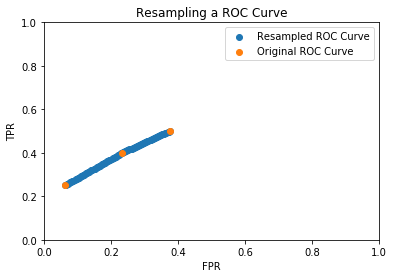

In [47]:
plt.scatter(*zip(*roc_sampled_points), label='Resampled ROC Curve')
plt.scatter(*zip(*roc_points), label='Original ROC Curve')
plt.legend()
plt.xlabel('FPR')
plt.xlim((0, 1))
plt.ylabel('TPR')
plt.ylim((0, 1))
plt.title('Resampling a ROC Curve')
plt.show()